Vamos a crear un portico de dos paños

*Input:*

- L1 : Longitud del paño 1
- L2 : Longitud del paño 2
- H1 : Altura de la columnas
- Fc : Resistencia a la compresion del concreto
- Seccion de columnas y vigas

---

In [16]:
import os
import sys
import comtypes.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# True: Trabajará con el programa ETBAS que esté abierto
# False: Se abrirá el programa de manera Automaticade 
AttachToInstance = False


# True: para especificar manualmente la ruta a ETABS.exe
# False: se usará la última versión instalada de ETABS
SpecifyPath = True

# si el indicador anterior está en True, especifique la ruta a ETABS a continuación
ProgramPath = "C:\Program Files\Computers and Structures\ETABS 20\ETABS.exe"

# ruta completa del modelo 
# ajústelo a la ruta deseada de su modelo
APIPath = 'C:\CSi_ETABS_API_Example'
if not os.path.exists(APIPath):
    try:
        os.makedirs(APIPath)
    except OSError:
        pass
ModelPath = APIPath + os.sep + 'API_1-001.edb'

# crear objeto API helper
helper = comtypes.client.CreateObject('ETABSv1.Helper')
helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper)

if AttachToInstance:
    try:
        # obtener el objeto ETABS activo
        myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject") 
    except (OSError, comtypes.COMError):
        print("No running instance of the program found or failed to attach.")
        sys.exit(-1)
else:
    if SpecifyPath:
        try:
            # crear una instancia del objeto ETABS a partir de la ruta especificada
            myETABSObject = helper.CreateObject(ProgramPath)
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program from " + ProgramPath)
            sys.exit(-1)
    else:
        try: 
            # crear una instancia del objeto ETABS a partir del último ETABS instalado
            myETABSObject = helper.CreateObjectProgID("CSI.ETABS.API.ETABSObject") 
        except (OSError, comtypes.COMError):
            print("Cannot start a new instance of the program.")
            sys.exit(-1)

    # Comenzar la aplicacion de ETABS
    myETABSObject.ApplicationStart()

# Crear un objeto SapModel
ret = SapModel = myETABSObject.SapModel

# Iniciar Modelo
ret = SapModel.InitializeNewModel()

0

In [18]:
#crear nuevo modelo en blanco
ret = SapModel.File.NewBlank()

In [20]:
#cambiar a unidades ton_m
Tonf_m_C = 12
ret = SapModel.SetPresentUnits(Tonf_m_C)

In [21]:
# Definicion de material Concreto
fc = 280
material_type = 2
material_name = "fc=" + str(fc) + "kg/cm2"    # fc=280kg/cm2
ret = SapModel.PropMaterial.SetMaterial(material_name, material_type)
# definir las propiedades mecanicas del material
E = 150000*fc**0.5          
v = 0.2
CT = 0.0000055
ret = SapModel.PropMaterial.SetMPIsotropic(material_name, E, v, CT)

In [22]:
# crear seccion de viga y columna
# Viga
b_v = 0.3
h_v = 0.6
nombre_viga = "V " + str(b_v) + "x" + str(h_v)          # V 0.3x0.6
ret = SapModel.PropFrame.SetRectangle(nombre_viga, material_name, h_v , b_v)


# Columna
b_c = 0.45
h_c = 0.45
nombre_columna = "C " + str(b_c) + "x" + str(h_c)       # C 0.45x0.45
ret = SapModel.PropFrame.SetRectangle(nombre_columna, material_name, h_c , b_c)

In [23]:
# #definir modificadores de propiedad de sección de marco
# ModValue = [1000, 0, 0, 1, 1, 1, 1, 1]
# ret = SapModel.PropFrame.SetModifiers(nombre_viga, ModValue)
# ret = SapModel.PropFrame.SetModifiers(nombre_col, ModValue)

**CREACION DE PORTICO**

Esta creacion será de manera manual y mecanica

- Creacion de Frame por Coordenadas

- Ingresando parametros

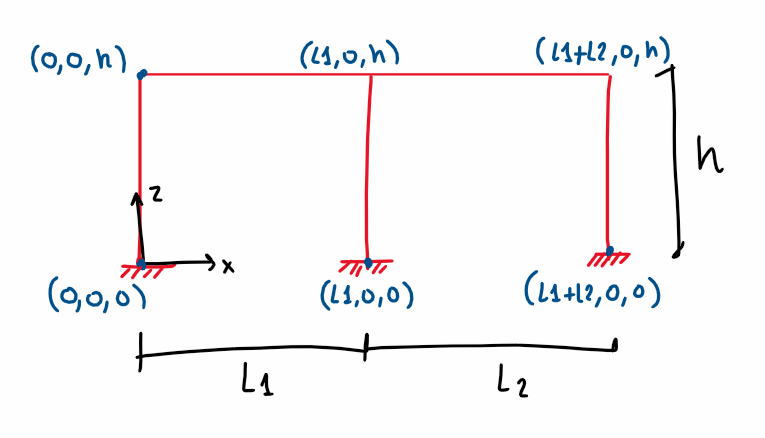

In [24]:
h = 3       # m
L1 = 4      # m 
L2 = 7      # m


FrameName1 = ' '
FrameName2 = ' '
FrameName3 = ' '
FrameName4 = ' '
FrameName5 = ' '

# Columnas
[FrameName1, ret] = SapModel.FrameObj.AddByCoord(0,0,0,0,0,h, FrameName1, nombre_columna, '1', 'Global')
[FrameName2, ret] = SapModel.FrameObj.AddByCoord(L1,0,0,L1,0,h, FrameName2, nombre_columna, '2', 'Global')
[FrameName3, ret] = SapModel.FrameObj.AddByCoord(L1+L2,0,0,L1+L2,0,h, FrameName3, nombre_columna, '3', 'Global')

# Vigas
[FrameName4, ret] = SapModel.FrameObj.AddByCoord(0,0,h,L1,0,h, FrameName4, nombre_viga, '4', 'Global')
[FrameName5, ret] = SapModel.FrameObj.AddByCoord(L1,0,h,L1+L2,0,h, FrameName5, nombre_viga, '5', 'Global')

#actualizar vista, actualizar (inicializar) zoom
ret = SapModel.View.RefreshView(0, False)

In [25]:
# asignar resitrcciones
PointNamei = ' '
PointNamej = ' '
Restraint = [True, True, True, True, True, True]
# asignar resitrccion a la primera columna
[PointNamei ,PointNamej, ret] = SapModel.FrameObj.GetPoints(FrameName1, PointNamei, PointNamej)
ret = SapModel.PointObj.SetRestraint(PointNamei, Restraint)

# asignar resitrccion a la segunda columna
PointNamei = ' '
PointNamej = ' '
[PointNamei ,PointNamej, ret] = SapModel.FrameObj.GetPoints(FrameName2, PointNamei, PointNamej)
ret = SapModel.PointObj.SetRestraint(PointNamei, Restraint)

# asignar resitrccion a la tercera columna
PointNamei = ' '
PointNamej = ' '
[PointNamei ,PointNamej, ret] = SapModel.FrameObj.GetPoints(FrameName3, PointNamei, PointNamej)
ret = SapModel.PointObj.SetRestraint(PointNamei, Restraint)

In [26]:
# asignar cargas
# crear un Load Pattern
ret = SapModel.LoadPatterns.Add("FH", 8, 0, True)

# Asignar carga distribuida Dead y Live
ret = SapModel.FrameObj.SetLoadDistributed(FrameName4, "Dead", 1, 2, 0, 1, -0.4, -0.4, "Local")
ret = SapModel.FrameObj.SetLoadDistributed(FrameName4, "Live", 1, 2, 0, 1, -0.25, -0.25, "Local")

ret = SapModel.FrameObj.SetLoadDistributed(FrameName5, "Dead", 1, 2, 0, 1, -0.4, -0.4, "Local")
ret = SapModel.FrameObj.SetLoadDistributed(FrameName5, "Live", 1, 2, 0, 1, -0.25, -0.25, "Local")

In [27]:
# Asignar carga puntual
PointName1 = ' '
PointName2 = ' '
[PointName1, PointName2, ret] = SapModel.FrameObj.GetPoints(FrameName1, PointName1, PointName2)
PointLoadValue = [1,0,0,0,0,0]
ret = SapModel.PointObj.SetLoadForce(PointName2, 'FH', PointLoadValue)

PointName1 = ' '
PointName2 = ' '
[PointName1, PointName2, ret] = SapModel.FrameObj.GetPoints(FrameName3, PointName1, PointName2)
PointLoadValue = [1,0,0,0,0,0]
ret = SapModel.PointObj.SetLoadForce(PointName2, 'FH', PointLoadValue)

In [29]:
#actualizar vista, actualizar (inicializar) zoom
ret = SapModel.View.RefreshView(0, False)

In [30]:
# guardar el modelo
ret = SapModel.File.Save(ModelPath)

In [31]:
# correr el modelo
ret = SapModel.Analyze.RunAnalysis()